In [10]:
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os




def make_result_dicts(result_list):
    result_dict = {}
    for list in result_list:
        result_csv = glob.glob(os.path.join(list, '*'))
        emb_size = list.split('\\')[-1]

        csv_list = []
        for csv in result_csv:
            df=pd.read_csv(csv)
            csv_name = csv.split('\\')[-1].split('.')[0].split('_')[1:-1]
            csv_name = '_'.join(csv_name)

            df["emb_type"]=csv_name
            df["emb_size"]=emb_size

            csv_list.append(df)
            result_dict[emb_size] = csv_list
    return result_dict

lgm_results = glob.glob(os.path.join('results_lgm/', '*'))
svm_results = glob.glob(os.path.join('results_svm/', '*'))
lr_results = glob.glob(os.path.join('results_lr/', '*'))

lgm_dict = make_result_dicts(lgm_results)
svm_dict = make_result_dicts(svm_results)
lr_dict = make_result_dicts(lr_results)


In [11]:

def extract_std(s):
    parts = s.strip('()').split(', ')
    return float(parts[1])

def clean_metric(s):
    return s.strip('()').split(', ')[0]

def clean_df(df):
    metrics = ['AUC', 'Accuracy', 'f1', 'Recall', 'Precision', 'Average Precision', 'Sensitivity', 'Specificity', 'MCC']
    embedder_name = df['emb_type'][0]
    embedder_size = df['emb_size'][0]
    df=df.copy()

    for metric in metrics:
        # Extract standard deviation and store in a new column with '_st' suffix
        df[f"{metric}_st"] = df[metric].apply(extract_std).apply(pd.to_numeric, errors='coerce').round(4)
        # Clean the main metric and overwrite the original column
        df[metric] = df[metric].apply(clean_metric).apply(pd.to_numeric, errors='coerce').round(3)


    # Select columns for metric_df and st_df
    metric_names = ["dataset_name", "model"] + metrics
    st_names = ["dataset_name", "model"] + [f"{metric}_st" for metric in metrics]

    metric_df = df[metric_names]
    st_df = df[st_names]
    return metric_df, st_df, embedder_name, embedder_size

In [12]:
def make_heatmap(dataset1,dataset2,model_name="model",embedder_name="embedder",embedder_size="embedder_size"):

    if model_name!="model":
        model_name= dataset1.iloc[0]['model']

    y_labels1 = dataset1.iloc[:, 0]
    y_labels2 = dataset2.iloc[:, 0]

    dataset1 = dataset1.iloc[:, 2:]
    dataset2 = dataset2.iloc[:, 2:]

    fig, axes = plt.subplots(1, 2, figsize=(16,6))

    sns.heatmap(dataset1, cmap="Blues", annot=True, linewidths=.5, yticklabels=y_labels1, ax=axes[0],fmt=".3f")
    sns.heatmap(dataset2, cmap="Greens", annot=True, linewidths=.5, yticklabels=y_labels2, ax=axes[1],fmt=".3f")

    axes[0].set_title(f"Heatmap for {embedder_name} {model_name} with size {embedder_size} metric results")
    axes[1].set_title(f"Heatmap for {embedder_name} {model_name} with size {embedder_size} standard deviation results")

    plt.tight_layout()
    plt.show()

In [13]:
def plot_results(result_dict,embedding_size):
    key = embedding_size
    print(f"\n Results for embeddings with size {key} \n\n")

    for df in result_dict[key]:
        metric_df, st_df,embedder_name,embedder_size = clean_df(df)
        make_heatmap(metric_df, st_df,embedder_name=embedder_name,embedder_size=embedder_size)



 Results for embeddings with size 500 




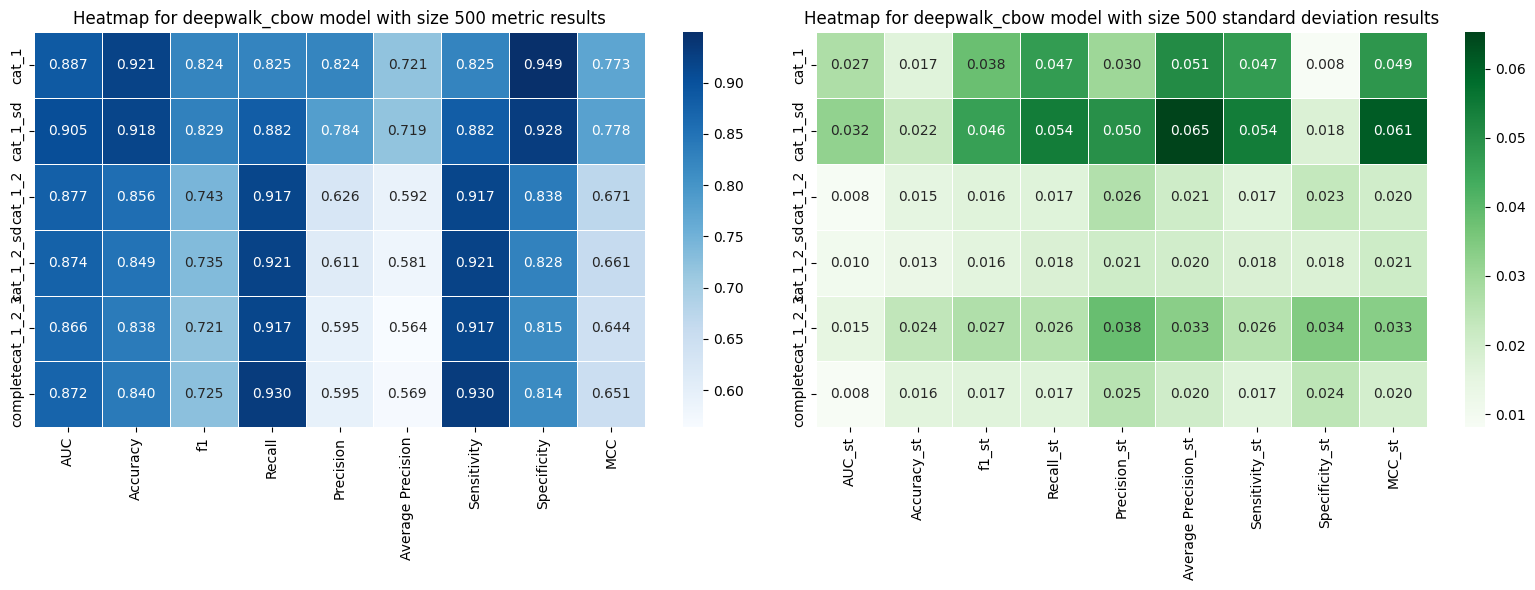

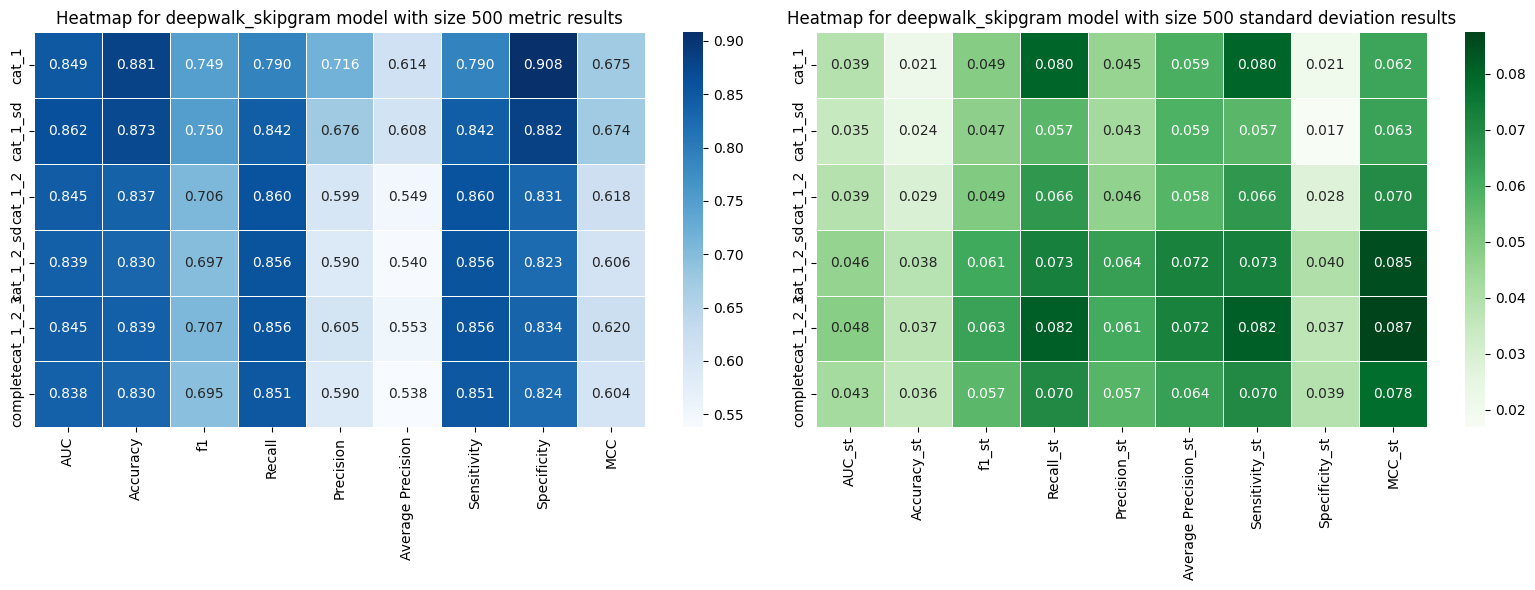

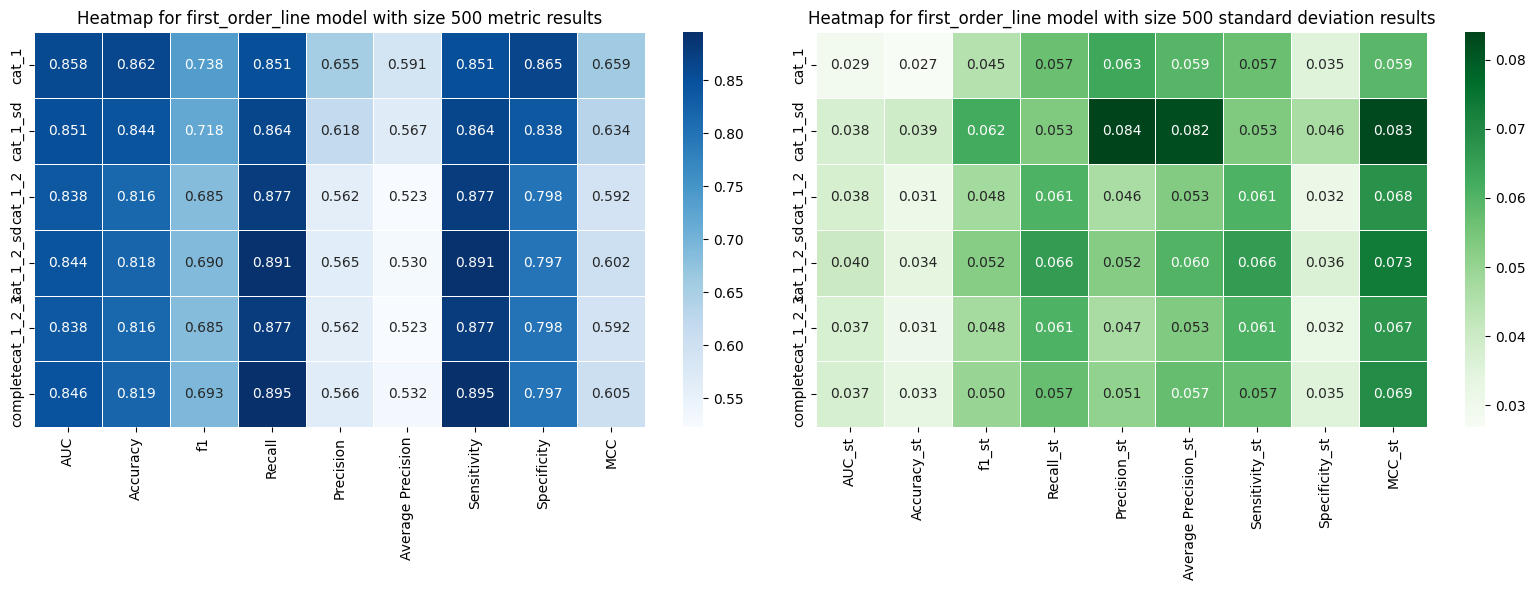

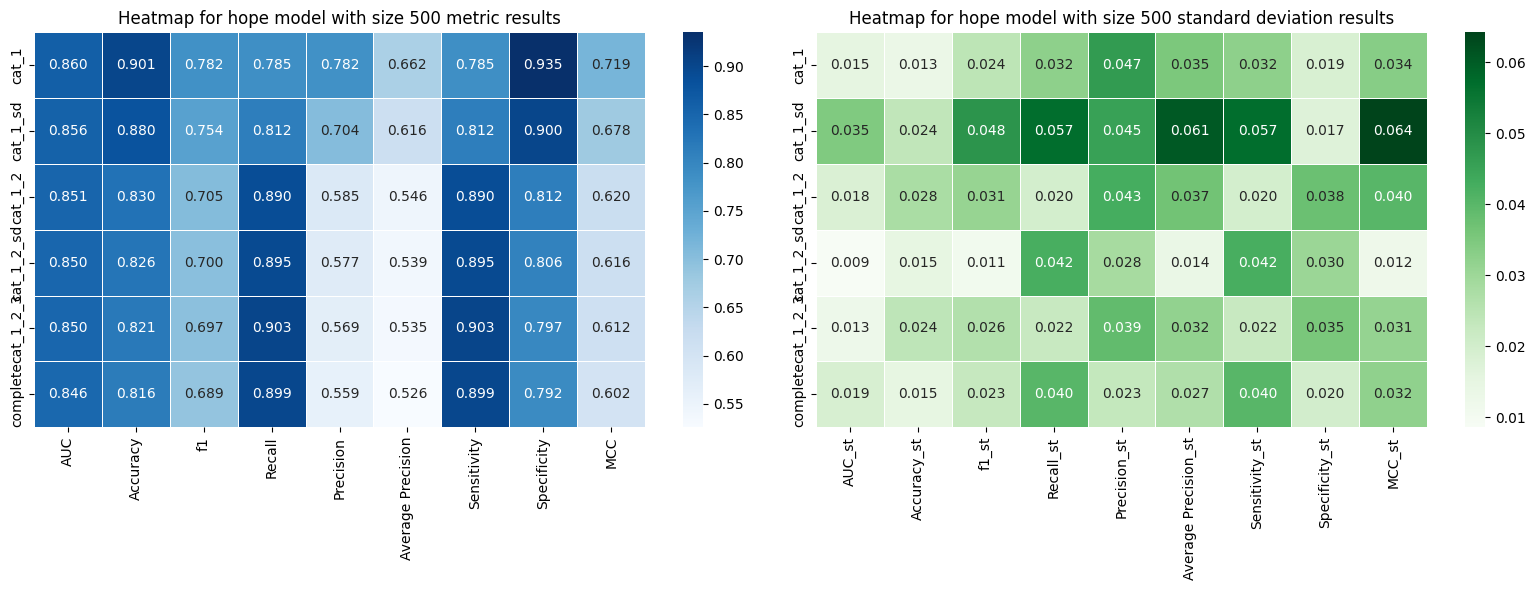

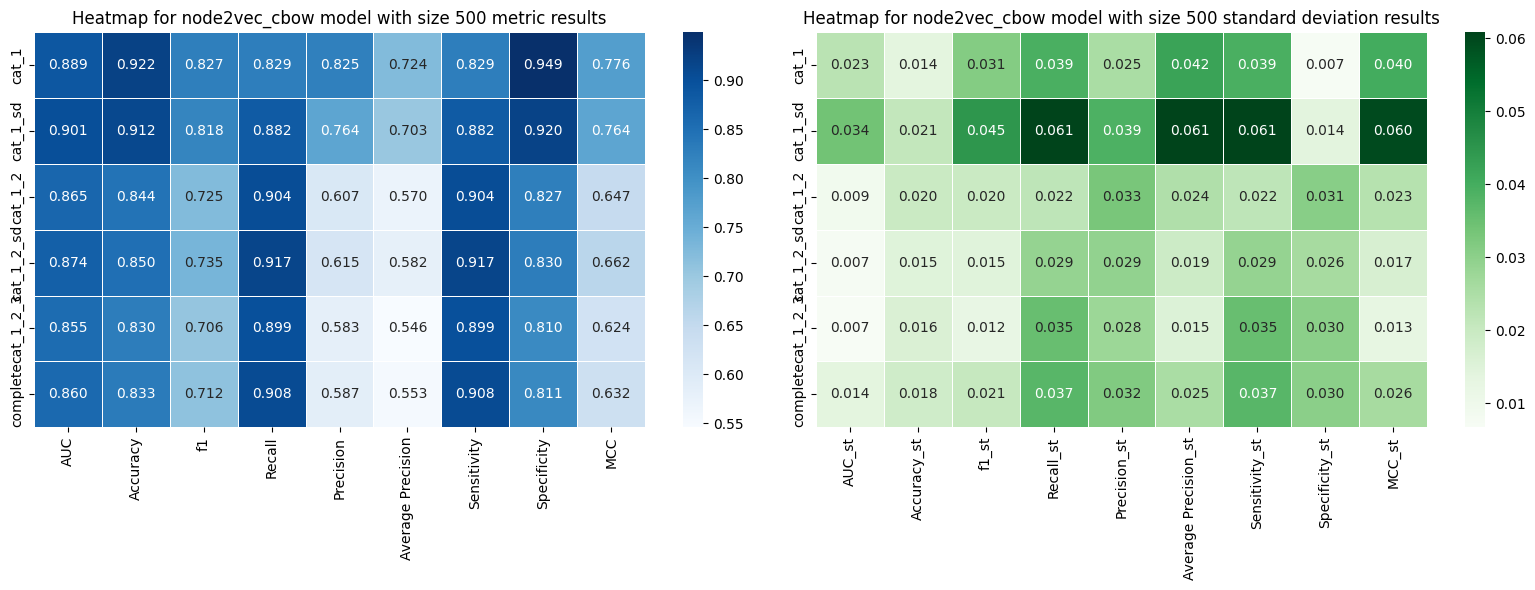

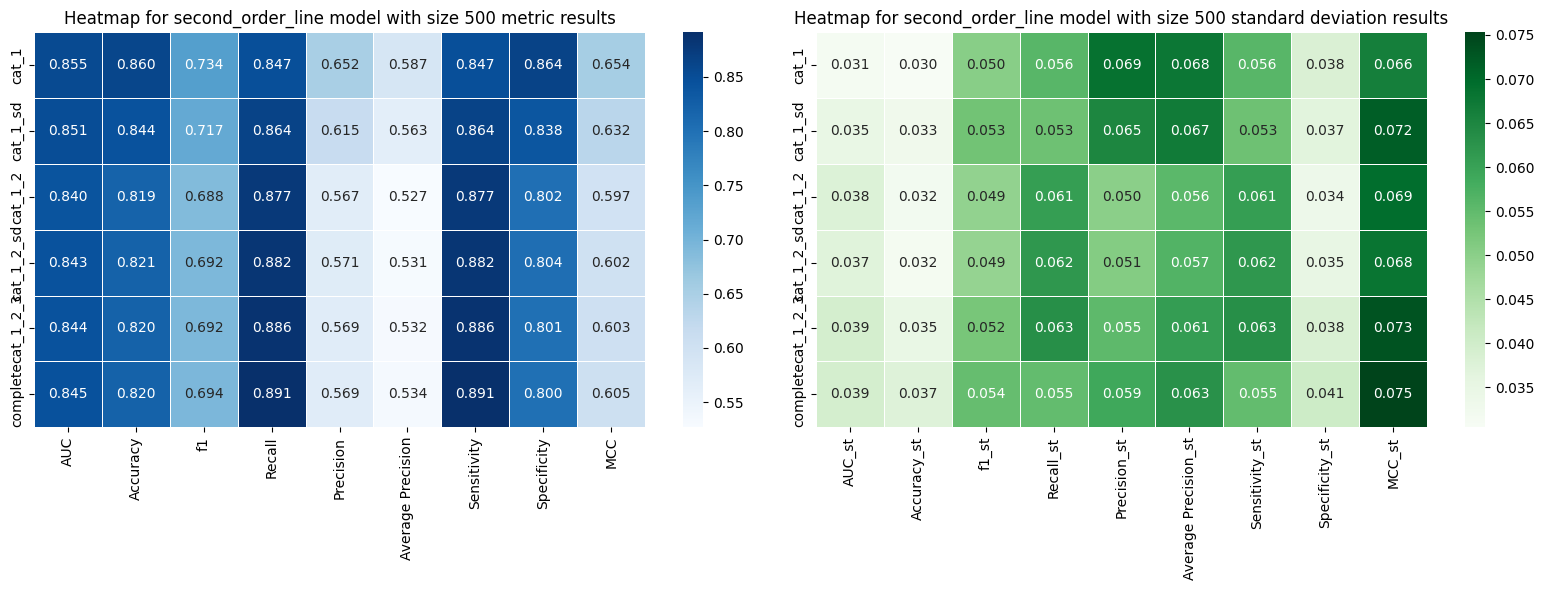

In [25]:
plot_results(lr_dict,'500')